In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

In [ ]:
window_size = 20
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

In [ ]:
import scipy.io
import TIRE

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [ ]:
def get_hasc(window_size, stride=1, scale_min=-1, scale_max=1):
    mat=scipy.io.loadmat('person671_out.mat')
    y = pd.DataFrame(mat['Y'])
    l = pd.DataFrame(mat['L'])
    timeseries = np.linalg.norm(np.array(y), axis=1)
    windows = utils.ts_to_windows(timeseries, 0, window_size, stride)
    windows = utils.minmaxscale(windows,scale_min,scale_max)
    return timeseries, windows, l.T

In [185]:
def get_bees(id, window_size, stride=1, scale_min=-1, scale_max=1):
    mat=scipy.io.loadmat('beedance2-' + str(id) + '.mat')
    y = pd.DataFrame(mat['Y'])
    l = np.array(pd.DataFrame(mat['L']))
    windows1 = utils.ts_to_windows(y[0], 0, window_size, stride)
    windows1 = utils.minmaxscale(windows1,scale_min,scale_max)
    windows2 = utils.ts_to_windows(y[1], 0, window_size, stride)
    windows2 = utils.minmaxscale(windows2,scale_min,scale_max)
    windows3 = utils.ts_to_windows(y[2], 0, window_size, stride)
    windows3 = utils.minmaxscale(windows3,scale_min,scale_max)
    windows = utils.combine_ts([windows1, windows2, windows3])
    return y, windows, l

In [186]:
timeseries, windows_TD, parameters = get_bees(1, window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

In [188]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_43 (Dense)            (None, 3, 1)                 61        ['input_23[0][0]']            
                                                                                                  
 dense_44 (Dense)            (None, 3, 0)                 0         ['input_23[0][0]']            
                                                                                                  
 tf.concat_11 (TFOpLambda)   (None, 3, 1)                 0         ['dense_43[0][0]',            
                                                                     'dense_44[0][0]']     

In [190]:
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

[0.44493429194036527, 0.8532377863929124, 0.9034703366061939]


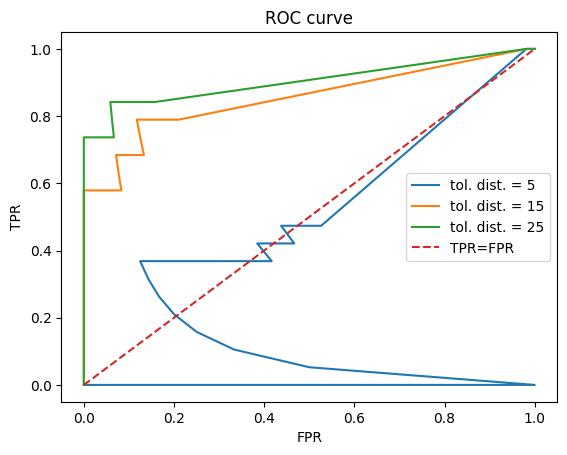

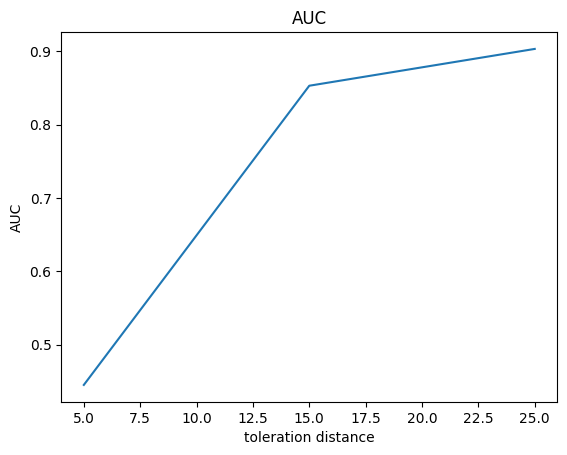

In [192]:
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)

Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_51 (Dense)            (None, 3, 1)                 61        ['input_27[0][0]']            
                                                                                                  
 dense_52 (Dense)            (None, 3, 0)                 0         ['input_27[0][0]']            
                                                                                                  
 tf.concat_13 (TFOpLambda)   (None, 3, 1)                 0         ['dense_51[0][0]',            
                                                                     'dense_52[0][0]']     

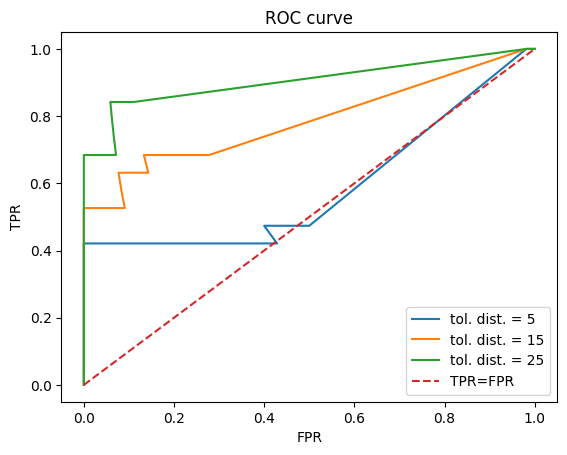

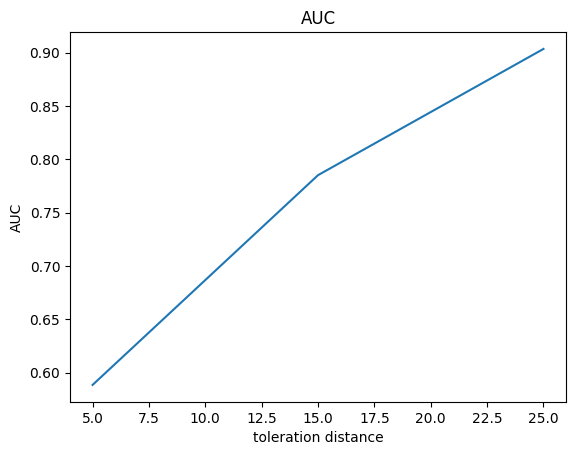

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_59 (Dense)            (None, 3, 1)                 61        ['input_31[0][0]']            
                                                                                                  
 dense_60 (Dense)            (None, 3, 0)                 0         ['input_31[0][0]']            
                                                                                                  
 tf.concat_15 (TFOpLambda)   (None, 3, 1)                 0         ['dense_59[0][0]',            
                                                                     'dense_60[0][0]']     

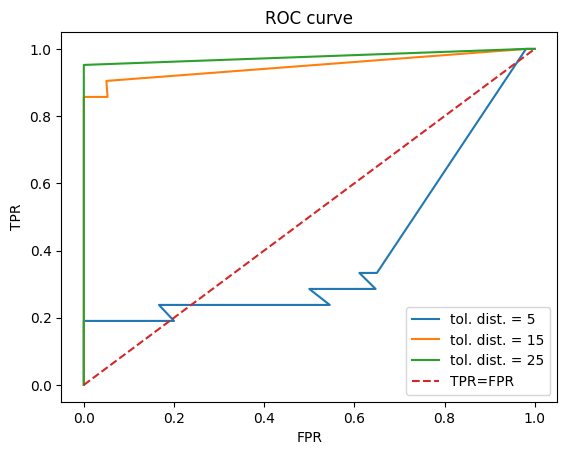

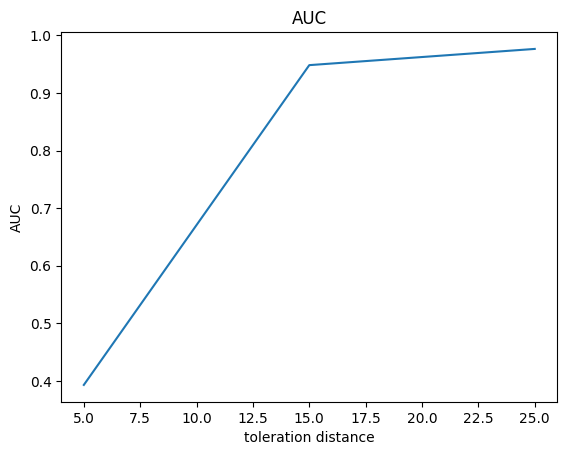

Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_35 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_67 (Dense)            (None, 3, 1)                 61        ['input_35[0][0]']            
                                                                                                  
 dense_68 (Dense)            (None, 3, 0)                 0         ['input_35[0][0]']            
                                                                                                  
 tf.concat_17 (TFOpLambda)   (None, 3, 1)                 0         ['dense_67[0][0]',            
                                                                     'dense_68[0][0]']     

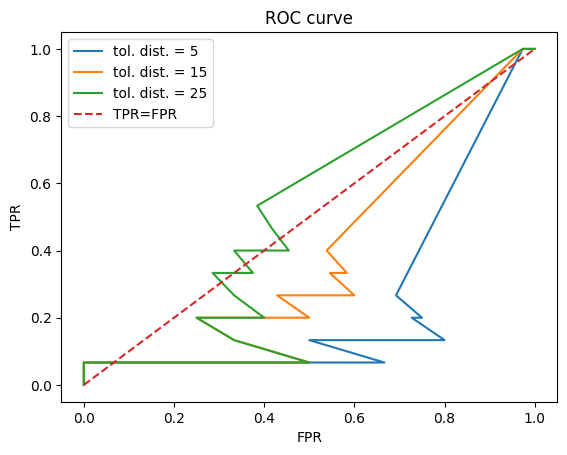

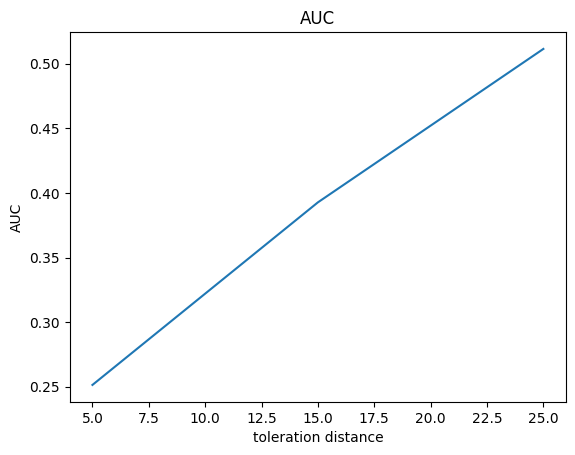

Model: "model_57"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_39 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_75 (Dense)            (None, 3, 1)                 61        ['input_39[0][0]']            
                                                                                                  
 dense_76 (Dense)            (None, 3, 0)                 0         ['input_39[0][0]']            
                                                                                                  
 tf.concat_19 (TFOpLambda)   (None, 3, 1)                 0         ['dense_75[0][0]',            
                                                                     'dense_76[0][0]']     

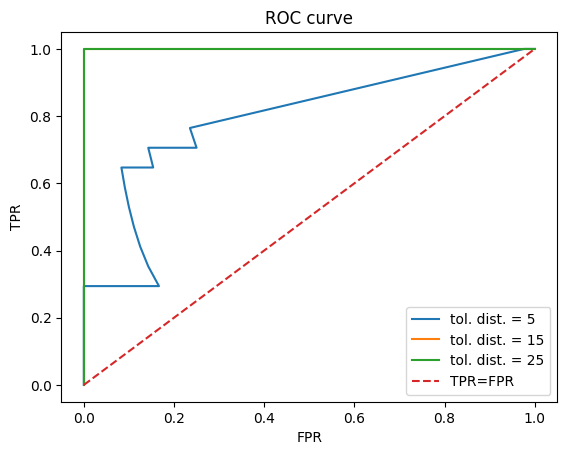

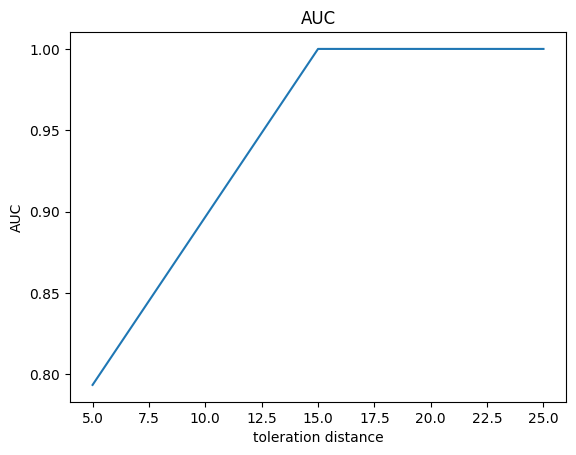

Model: "model_63"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_83 (Dense)            (None, 3, 1)                 61        ['input_43[0][0]']            
                                                                                                  
 dense_84 (Dense)            (None, 3, 0)                 0         ['input_43[0][0]']            
                                                                                                  
 tf.concat_21 (TFOpLambda)   (None, 3, 1)                 0         ['dense_83[0][0]',            
                                                                     'dense_84[0][0]']     

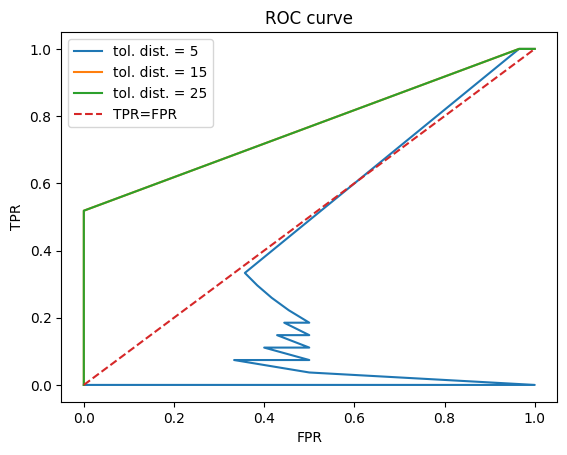

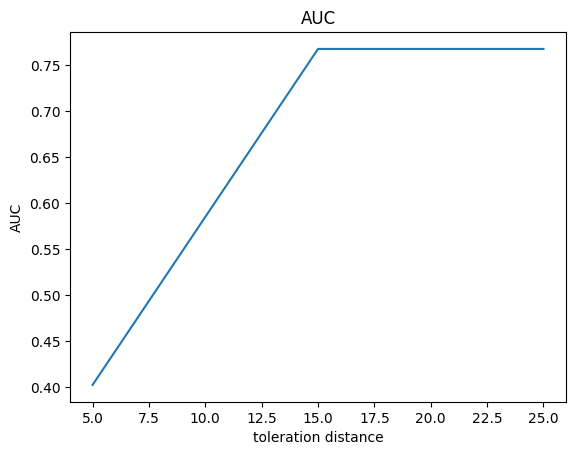

Model: "model_69"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_47 (InputLayer)       [(None, 3, 60)]              0         []                            
                                                                                                  
 dense_91 (Dense)            (None, 3, 1)                 61        ['input_47[0][0]']            
                                                                                                  
 dense_92 (Dense)            (None, 3, 0)                 0         ['input_47[0][0]']            
                                                                                                  
 tf.concat_23 (TFOpLambda)   (None, 3, 1)                 0         ['dense_91[0][0]',            
                                                                     'dense_92[0][0]']     

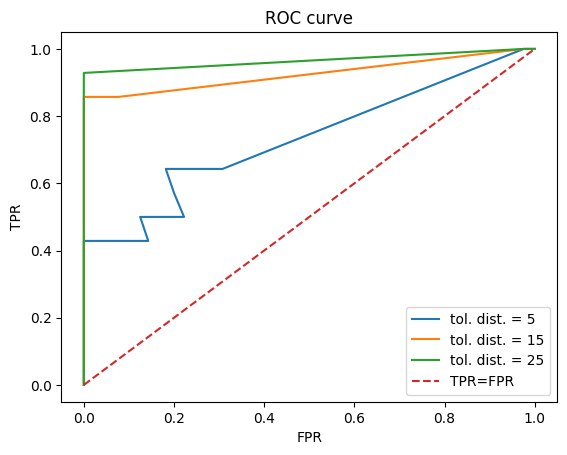

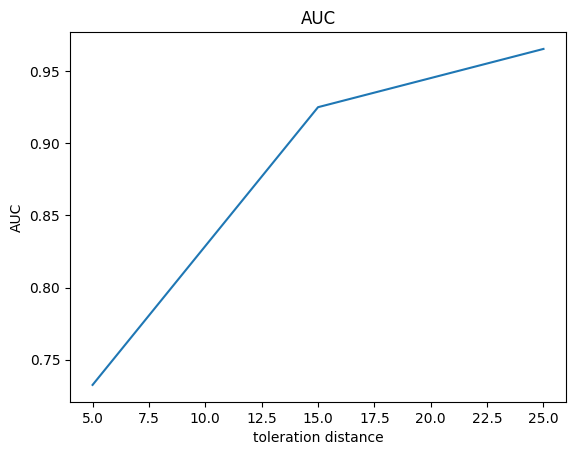

In [198]:
aucs = []
for i in range(1, 7):
    timeseries, windows_TD, parameters = get_bees(i, window_size)
    windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
    shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
    shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)
    dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
    change_point_scores = TIRE.change_point_score(dissimilarities, window_size)
    tol_distances = [5,15,25]
    auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)
    aucs.append(auc);

In [200]:
s = pd.DataFrame(aucs)

In [207]:
s.mean()

0    0.526860
1    0.803138
2    0.854084
dtype: float64